<a href="https://colab.research.google.com/github/AnacletoLAB/grape/blob/main/tutorials/Ensmallen_Automatic_Graph_Retrieval_STRING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensmallen Automatic Graph Retrieval - STRING
In this tutorial we will explore how to use the graphs that can be automatically retrieved by [Ensmallen](https://github.com/AnacletoLAB/ensmallen) from the [STRING](https://string-db.org/) graph repository.

## Installing GraPE
In order to install the [GraPE library](https://github.com/AnacletoLAB/grape), which includes the [Ensmallen](https://github.com/AnacletoLAB/ensmallen) (efficient graph data structure) and [Embiggen](https://github.com/monarch-initiative/embiggen) (graph machine learning) modules, run:

```bash
pip install grape
```

## Installing Ensmallen
In order to install the Ensmallen graph library exclusively (for instance if you want to avoid having dependencies to TensorFlow) just run:

```bash
pip install ensmallen
```

In [1]:
!pip install -q grape

     |████████████████████████████████| 45.5 MB 20 kB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 90 kB 9.2 MB/s 


Installing TSNECUDA for the decomposition visualizations.

In [2]:
!pip install -q tsnecuda==3.0.0+cu110 -f https://tsnecuda.isx.ai/tsnecuda_stable.html --no-dependencies
!pip install -q faiss

     |████████████████████████████████| 55.4 MB 10 kB/s 
     |████████████████████████████████| 4.7 MB 4.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsnecuda 3.0.0+cu110 requires faiss==1.6.5, but you have faiss 1.5.3 which is incompatible.


## Which STRING graphs are available?
To get a list of all the STRING graphs currently available from Ensmallen, we can quickly get the dataframe with all of the graphs data and query it. Note that for most graphs, multiple versions will be available from different version of STRING and, fom a given version of the library, multiple versions of the graph for an organism will be available.

In [3]:
from ensmallen.datasets import get_all_available_graphs_dataframe

In [4]:
available_graphs = get_all_available_graphs_dataframe()
available_graphs[available_graphs.repository == "string"]

,repository,graph_name,version
11,string,CorynebacteriumDesertiGimn1010,homology.v11.5
12,string,CorynebacteriumDesertiGimn1010,physical.links.v11.5
13,string,CorynebacteriumDesertiGimn1010,links.v11.5
14,string,PaenibacillusAquistagni,homology.v11.5
15,string,PaenibacillusAquistagni,physical.links.v11.5
...,...,...,...
56697,string,AlteromonasMacleodiiDeep,links.v11.0
56698,string,AlteromonasMacleodiiDeep,links.v11.5
56699,string,MicrococcalesBacterium72143,homology.v11.5
56700,string,MicrococcalesBacterium72143,physical.links.v11.5


## How to load up a graph
To retrieve one of the available STRING graphs, for instance Homo Sapiens, as per any other repository, you can use:

In [5]:
from ensmallen.datasets.string import HomoSapiens

In [6]:
graph = HomoSapiens()

Let's get the graph report:

In [7]:
graph

<h2>HomoSapiens</h2><p>The undirected graph HomoSapiens has 19566 nodes and 5969249 edges.</p><h3>RAM requirements</h3><p>The RAM requirements for the nodes and edges data structures are 5.21MB and 11.71MB respectively.</p><h3>Degree centrality</h3><p>The minimum node degree is 0, the maximum node degree is 7507, the mode degree is 0, the mean degree is 610.17 and the node degree median is 485.</p><p>The nodes with highest degree centrality are: <a href='https://string-db.org/network/9606.ENSP00000229239' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000229239'>9606.ENSP00000229239</a> (degree 7507 and weighted degree 7507), <a href='https://string-db.org/network/9606.ENSP00000349960' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000349960'>9606.ENSP00000349960</a> (degree 6940 and weighted degree 6940), <a href='https://string-db.org/network/9606.ENSP00000451828' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000451828'>9606.ENSP00000451828</a> (degree 5918 and weighted degree 5918), <a href='https://string-db.org/network/9606.ENSP00000298910' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000298910'>9606.ENSP00000298910</a> (degree 5804 and weighted degree 5804) and <a href='https://string-db.org/network/9606.ENSP00000269305' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000269305'>9606.ENSP00000269305</a> (degree 5652 and weighted degree 5652).</p><h3>Disconnected nodes</h3><p>Disconnected nodes are nodes that are not connected to any other node.The graph contains 181 disconnected nodes.</p><h4>Singleton nodes</h4><p>Singleton nodes are nodes with no edge to other nodes nor selfloops. The graph contains 181 singleton nodes, which are <a href='https://string-db.org/network/9606.ENSP00000278779' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000278779'>9606.ENSP00000278779</a>, <a href='https://string-db.org/network/9606.ENSP00000313324' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000313324'>9606.ENSP00000313324</a>, <a href='https://string-db.org/network/9606.ENSP00000315794' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000315794'>9606.ENSP00000315794</a>, <a href='https://string-db.org/network/9606.ENSP00000316644' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000316644'>9606.ENSP00000316644</a> and <a href='https://string-db.org/network/9606.ENSP00000323241' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000323241'>9606.ENSP00000323241</a>, plus other 176 singleton nodes.</p><h3>Weights</h3><p>The minimum edge weight is 150, the maximum edge weight is 999 and the total edge weight is 3342953700.</p><h4>Weighted degree centrality</h4><p>The minimum node degree is 0.00, the maximum node degree is 2277846.00, the mean degree is 170855.24 and the node degree median is 130738.</p><p>The nodes with highest degree centrality are: <a href='https://string-db.org/network/9606.ENSP00000269305' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000269305'>9606.ENSP00000269305</a> (degree 5652 and weighted degree 5652), <a href='https://string-db.org/network/9606.ENSP00000229239' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000229239'>9606.ENSP00000229239</a> (degree 7507 and weighted degree 7507), <a href='https://string-db.org/network/9606.ENSP00000349960' target='_blank' title='Go to STRING Homo sapiens to get more informations about 9606.ENSP00000349960'>9606.ENSP00000349960</a> (degree 6940 and weighted degree 6940), <a href='https://string-db.org/network/9606.ENSP00000479618' target='_blank' title='Go to 

## Some example operations on the graph
Here follows some examples of operations that can be executed on the graph object.

### How to easily find a method
The library includes a user recommender system to help you find any method, for instance suppose you want to compute the diameter and do not know the method name, or maybe are distracted and mistype it:

In [8]:
graph.djametr

AttributeError: ignored

Additionally, generally speaking you can alway use the `dir` method to search for a method:

In [9]:
dir(graph)

['__and__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_repr_html_',
 'add_selfloops',
 'approximated_vertex_cover_set',
 'are_nodes_remappable',
 'complete_walks',
 'connected_components',
 'connected_holdout',
 'contains',
 'contains_identity_matrix',
 'cooccurence_matrix',
 'decode_edge',
 'drop_disconnected_nodes',
 'drop_parallel_edges',
 'drop_selfloops',
 'drop_singleton_nodes',
 'drop_singleton_nodes_with_selfloops',
 'drop_unknown_edge_types',
 'drop_unknown_node_types',
 'dump_edges',
 'dump_nodes',
 'enable',
 'encode_edge',
 'filter_from_ids',
 'filter_from_names',
 'from_csv',
 'generate_barbel

Finally, to see a method documentation you can use:

In [10]:
help(graph.get_node_degrees)

Help on built-in function get_node_degrees:

get_node_degrees() method of builtins.Graph instance
    Returns the unweighted degree of every node in the graph



### Enabling time-memory tradeoffs
The Ensmallen library includes a few time-memory tradeoffs that allow you to choose to spend more memory and get faster execution times. While we do not currently enable these by default because we do not know what you will be doing with the graph object, in most use cases (graphs within a few million nodes) they can be enabled without cornerns.

In [11]:
graph.enable()

### Diameter of the graph
Computing the diameter of the graph using [ifub](https://who.rocq.inria.fr/Laurent.Viennot/road/papers/ifub.pdf).

Since the graph is not connected, it has infinite diameter:

In [12]:
%%time
graph.get_diameter()

CPU times: user 27 µs, sys: 3 µs, total: 30 µs
Wall time: 35.3 µs


inf

In order to get the diameter of the component with the most central node, you can use:

In [13]:
%%time
graph.get_diameter(ignore_infinity=True)

CPU times: user 29.2 s, sys: 105 ms, total: 29.3 s
Wall time: 15 s


5.0

### Connected components
Compute the connected components of the graph:

In [14]:
%%time
(component_ids, components_number, minimum_component_size, maximum_component_size) = graph.connected_components()

CPU times: user 284 ms, sys: 1.93 ms, total: 286 ms
Wall time: 155 ms


## Compute the graph node embedding
Before running this section, **remember to require a GPU instance**!

In [15]:
from embiggen.pipelines import get_available_node_embedding_methods, compute_node_embedding

The node embedding methods currently supported can be retrieved as follows:

In [16]:
get_available_node_embedding_methods()

['CBOW',
 'GloVe',
 'SkipGram',
 'Siamese',
 'TransE',
 'SimplE',
 'TransH',
 'TransR']

Let's use GloVe:

In [17]:
node_embedding, history = compute_node_embedding(
    graph,
    node_embedding_method_name="GloVe"
)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


0epoch [00:00, ?epoch/s]

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


Let's take a look at the node embedding:

In [18]:
node_embedding

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
9606.ENSP00000000233,-0.433515,0.445347,-0.661953,0.059283,0.465081,0.426361,0.075465,-0.029799,0.478807,0.262451,0.423468,-0.088231,-0.666114,-0.214656,-0.474011,-0.916291,0.544104,-0.056710,0.317342,0.408188,0.699560,0.285877,-0.555367,-0.332335,-0.074974,-0.595647,-0.412593,-0.107532,0.313037,-0.650803,1.616424,-0.222111,0.302574,0.519531,0.020961,0.357529,0.078423,-0.604903,-0.429882,-0.027302,...,0.214053,0.031327,0.230393,0.559676,-0.262319,-0.448887,0.289381,0.537475,-0.236981,-0.386999,-0.249179,-0.367995,0.377134,0.271167,-0.035895,-0.107917,0.631664,-0.106256,0.127342,-0.364300,-0.070412,-0.338419,0.402629,0.612716,-0.013752,0.067399,-0.257728,-0.007606,0.359894,-0.037343,-0.775333,0.391122,0.631520,-0.202166,0.379238,-0.250065,0.379111,-0.098792,0.682269,-0.336618
9606.ENSP00000000412,0.159617,0.293405,-0.272826,0.641809,0.666581,0.431528,-0.098804,0.043164,0.378823,0.338792,-0.574493,0.196225,-0.112039,0.435140,-0.414201,-0.568425,0.649991,-0.358384,0.712476,-0.386004,0.166337,0.320289,-0.009451,-0.018820,0.167666,-0.416065,0.280549,-0.542952,0.451595,-0.158911,0.444690,-0.763738,-0.133363,0.001489,-0.264388,0.201133,0.474018,0.101005,0.075016,-0.177342,...,-0.191275,-0.641655,-0.180416,0.321345,-0.779419,0.043499,0.710053,0.419918,-0.031455,-0.705345,-0.343127,0.048197,0.434470,0.512739,-0.141624,0.361922,0.316900,-0.988975,0.180858,-0.019356,0.301916,-0.707052,-0.011324,0.012187,-0.654784,0.262674,-0.194445,-0.732112,0.018641,-0.418864,-0.657362,0.644082,-0.117294,-0.513030,0.146298,-0.757793,-0.049281,-0.013492,0.103454,-0.643775
9606.ENSP00000001008,0.261788,0.730532,0.180462,0.052728,0.592811,0.509599,0.210024,0.962840,0.215399,0.690236,-0.214575,0.023187,-0.455114,0.407652,-0.932254,0.123254,-0.083303,-0.156004,0.107539,-0.497856,0.019837,0.402053,0.409495,0.121968,0.174967,-0.637761,-0.710526,-0.217202,0.230267,-0.715576,0.444401,-0.153622,0.089123,0.118944,0.049022,-0.118379,0.325009,-0.271463,0.362090,0.008000,...,-0.496503,0.001402,-0.264745,-0.128019,-0.609679,-0.265078,0.136678,0.287358,-0.479753,-0.468944,0.289179,-0.405954,0.092383,0.848265,-0.131874,0.443107,0.466832,0.151632,0.195513,-0.319906,-0.279549,-0.984287,-0.402417,0.391543,-0.196268,0.036216,-0.196865,-0.508814,0.602026,0.143835,-0.878127,-0.289858,0.962317,-0.099757,0.291551,-0.023125,0.110705,-0.540645,0.663975,0.049523
9606.ENSP00000001146,-0.113880,-0.002601,-0.221792,0.317996,0.424935,0.071444,0.526391,0.316120,0.410914,0.063906,0.344084,-0.106429,-0.058823,1.084784,-0.606249,-0.380948,0.468992,-0.822540,0.238751,-0.009885,-0.104957,0.329895,-0.257702,0.380733,-0.180275,-0.141269,-0.911832,-0.727137,0.382818,-0.140273,0.095152,-0.085535,0.378015,0.485957,-0.406617,0.593403,0.735166,-0.000584,0.242590,-0.350407,...,-0.222146,-0.657340,-0.102294,0.015488,-0.404597,-0.183054,0.185820,1.028716,-0.296486,-0.437757,-0.046529,-0.359079,-0.810190,0.480972,0.107033,-0.133404,0.081690,0.120039,0.146559,-0.513561,0.057877,0.072797,-0.056804,0.421410,-0.335327,0.225560,-0.180892,-0.272610,0.855800,-0.319373,-0.305023,0.424503,0.262954,-0.482023,0.418917,-0.538384,-0.057678,-0.455229,0.675420,-0.629022
9606.ENSP00000002125,-0.282386,0.444535,0.730182,0.449228,0.729287,0.157760,0.479686,-0.037956,0.107734,0.086230,0.499360,0.129768,-0.058084,0.014970,-0.522026,-0.278969,0.183537,-0.404752,0.176561,-0.147180,0.923894,0.449505,-0.347892,-0.023850,-0.327323,-0.449771,-0.509083,-0.208199,0.232806,-0.157124,0.645830,-0.009621,-0.189140,0.119425,-0.101564,0.154991,-0.051704,-0.260172,-0.428394,-0.152270,...,-0.482360,-1.159792,-0.254088,-0.019213,-0.450703,-0.246668,0.421942,0.268103,-0.092299,-0.008863,-0.522281,-0.479126,-0.099306,0.090924,-0.667372,0.444911,0.290087,0.267620,-0.698689,-0.479918,0.157592,0.335755,-0.020872

### Visualizing the computed node embedding
We can use the visualizer, transforming the node embedding using a TSNE, to get a visualization of its node degrees and edge types:

In [19]:
from embiggen.visualizations import GraphVisualization

visualizer = GraphVisualization(graph)

visualizer.fit_transform_nodes(node_embedding)

(<Figure size 1000x1000 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8f95888850>)

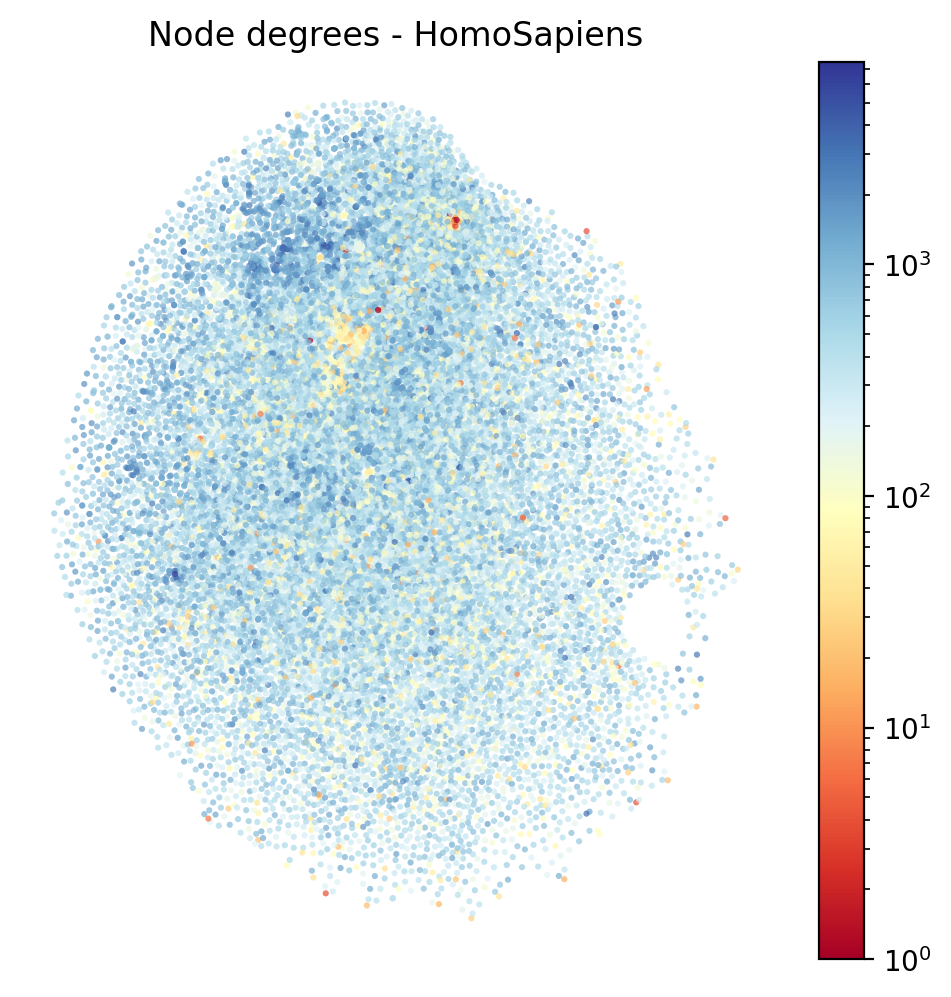

In [22]:
visualizer.plot_node_degrees(figsize=(5, 5))

(<Figure size 1000x1000 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8f95928c50>)

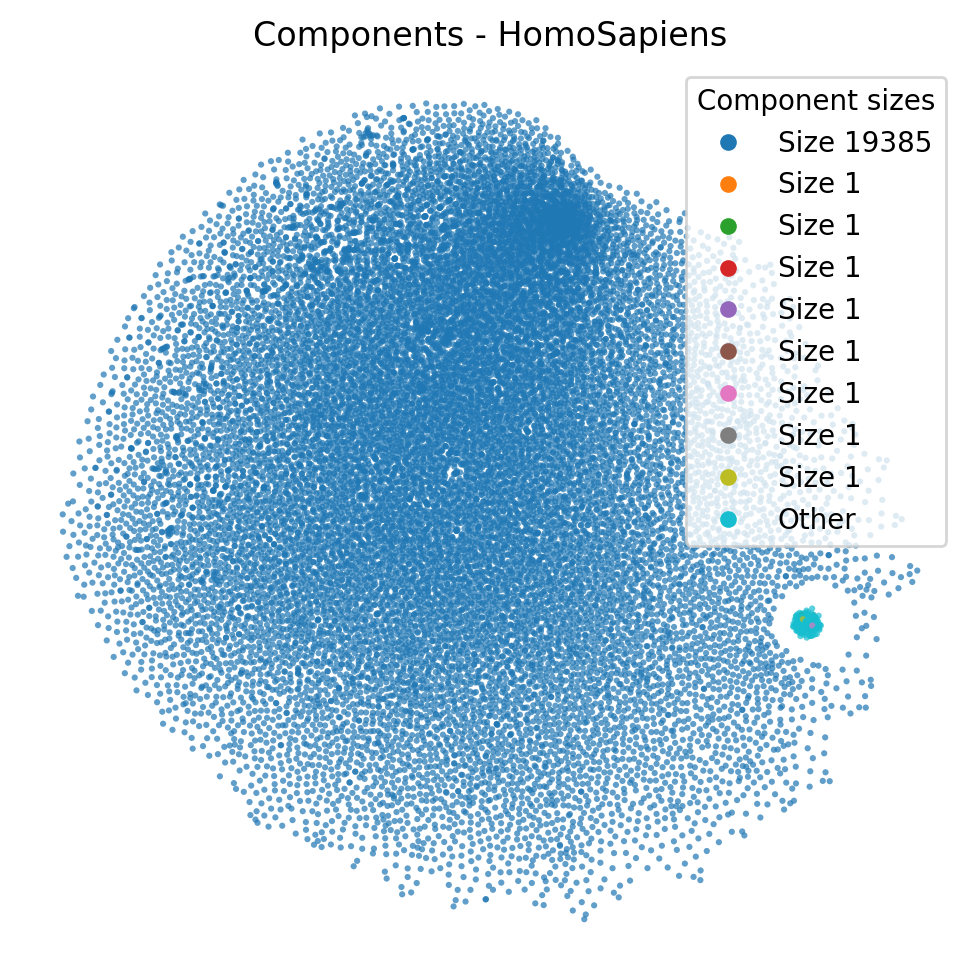

In [21]:
visualizer.plot_connected_components(figsize=(5, 5))

*Would you like this tutorial to include some more sections? Please do let us know [by opening a issue in the GraPE repository](https://github.com/AnacletoLAB/grape/issues/new).*